# 演習②　データ拡張（Data Augmentation）

## 事前準備  
・numpyでは簡単な画像処理が行える  
・PILのImageを利用して画像を取得し、npのarrayとして扱う  
・データは二次元配列で、ピクセル情報（RGB)を持つ  
・画像の表示はmatplotlibを利用  
・ImageNetで用いられる画像は224×224ピクセルが多いのでここではそれにならうものとする

In [3]:
# numpyで画像処理を行う準備
import numpy as np
from PIL import Image
# 画像読み込み(224×224ピクセルのサンプル画像)
image = np.array(Image.open('./img/sample_img.jpg'))
# 画像表示のためにmatplotlibを利用
from matplotlib import pylab as plt

## 画素情報の表示
・Image.open()で読み込まれた画像のデータ表示  
・no.array()形式の画素情報  
・image.shapeで縦・横のピクセル数  

In [4]:
#　画像データの表示
print(image)
# 画像の属性（縦・横・ピクセルの情報バイト数）
print(image.shape)

[[[235 239 242]
  [235 239 242]
  [235 239 242]
  ...
  [234 238 241]
  [234 238 241]
  [235 239 242]]

 [[234 238 241]
  [234 238 241]
  [234 238 241]
  ...
  [234 238 241]
  [234 238 241]
  [235 239 242]]

 [[234 238 241]
  [234 238 241]
  [234 238 241]
  ...
  [234 238 241]
  [234 238 241]
  [235 239 242]]

 ...

 [[168  91  21]
  [176  99  29]
  [179 102  34]
  ...
  [235 239 242]
  [235 239 242]
  [235 239 242]]

 [[179 100  31]
  [182 103  34]
  [182 103  34]
  ...
  [234 238 241]
  [234 238 241]
  [234 238 241]]

 [[177  96  30]
  [166  85  19]
  [170  87  19]
  ...
  [234 238 241]
  [234 238 241]
  [234 238 241]]]
(224, 224, 3)


## 現画像の表示
・plt.imshow()メソッドで画像を表示可能  

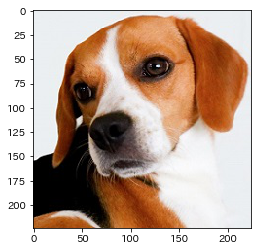

In [5]:
# 原画像の表示
plt.imshow( image )
plt.show()

## horizontal flip
・ 画像を水平方向に回転させる  
・ 元画像と左右対称の画像ができる  

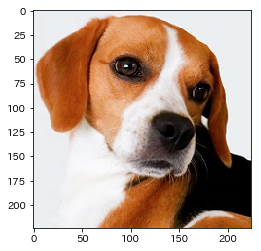

In [6]:
# horizontal flip

def horizontal_flip(image):
    image =  image[:, ::-1, :]
    return image

image_2 = horizontal_flip(image)

plt.imshow( image_2 )
plt.show()

## vertical flip
・ 画像を垂直方向に回転させる  
・ 元画像と上下対称の画像ができる  

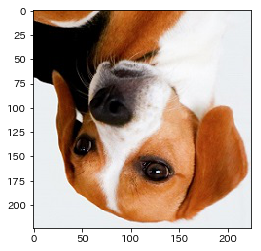

In [7]:
# vertical flip
def vertical_flip(image):
    image = image[::-1, :, :]
    return image

image_3 = vertical_flip(image)

# 画像の表示
plt.imshow( image_3 )
plt.show()

## random crop
・一枚の画像から指定された大きさでランダムに切り出す  
・切り出した画像をオリジナル画像のサイズにまで拡大して表示  

パターン 1


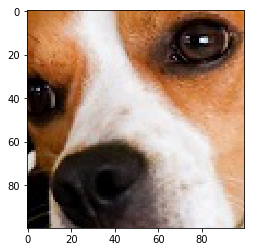

パターン 2


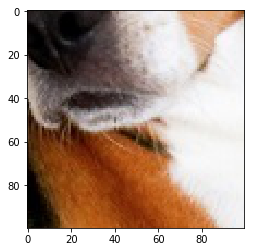

パターン 3


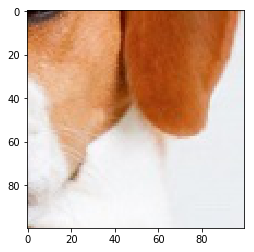

パターン 4


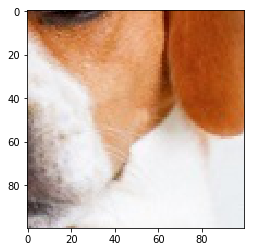

In [6]:
# random crop
def random_crop(image,crop_size=( 224 ,  224)):
    h, w, _ = image.shape
    # h,wとcrop_sizeが同じ場合、そのままの画像を返す
    if(h == crop_size[0] & w == crop_size[1]):
        return image
    # 0~(400-224)の間で画像のtop, leftを決める
    top = np.random.randint(0, np.abs(h - crop_size[0]))
    left = np.random.randint(0, np.abs(w - crop_size[1]))
    # top, leftから画像のサイズである224を足して、bottomとrightを決める
    bottom = top + crop_size[0]
    right = left + crop_size[1]

    # 決めたtop, bottom, left, rightを使って画像を抜き出す
    image = image[top:bottom, left:right, :]
    return image

# 100×100、乱数の種:0でrandom_seedを行う
np.random.seed(0) # 実行するたびに結果が異なるようにならないように乱数の種を固定
i = 1
# seed0の乱数で４つのrandom_crop画像を生成
while i <= 4:
    image_4 = random_crop(image,(100,100))
    # 画像の表示
    print("パターン",i)
    plt.imshow( image_4 )
    plt.show()
    i = i + 1

## cutout
・画像の一部にマスクをかける
・マスクサイズは一定の値にユーザーが決める  
・マスクの位置は乱数で決める  

パターン 1


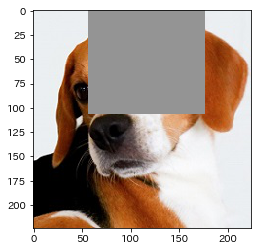

パターン 2


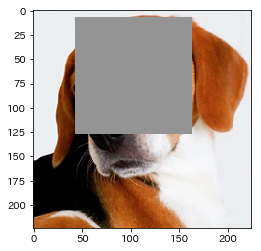

パターン 3


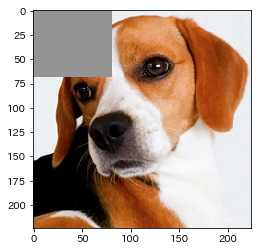

パターン 4


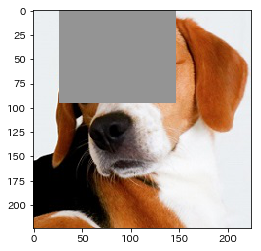

In [9]:
def cutout(image_origin, mask_size):
    # 最後に使うfill()は元の画像を書き換えるので、一旦コピー
    image = np.copy(image_origin)
    mask_value = image.mean()

    h, w, _ = image.shape
    # 乱数でマスク位置のtop, leftを決める
    # はみ出すことを許許し、0以上ではなく負の値もとるようにする(最大mask_size // 2はみ出す)
    top = np.random.randint(0 - mask_size // 2, h - mask_size)
    left = np.random.randint(0 - mask_size // 2, w - mask_size)
    bottom = top + mask_size
    right = left + mask_size

    # はみ出した場合の処理
    if top < 0:
        top = 0
    if left < 0:
        left = 0

    # マスク部分の画素値を平均値で埋める
    image[top:bottom, left:right, :].fill(mask_value)
    return image

# 100×100、乱数の種:0でrandom_seedを行う
np.random.seed(0) # 実行するたびに結果が異なるようにならないように乱数の種を固定
i = 1
# seed0の乱数で４つのcutout画像(サイズ120)を生成
while i <= 4:
    image_5 = cutout(image,120 )
    print("パターン",i)
    # 画像の表示
    plt.imshow( image_5 )
    plt.show()
    i = i + 1

## 問題1 
・前述のデータ拡張の関数を複数組み合わせて折にある画像**sample_img.jpg**を以下のような図形に変換して出力してください。

![sample_img.jpg](./img/sample_img_rotate.jpg)


## 問題２

![sample_cat.jpg](./img/sample_cat.jpg)

上の画像（**sample_cat.jpg**）に対し、以下の処理を施した画像を出力してください。

**・horizontal clip  
・vertical clip  
・random crop  
・cutout  **
  
の画像を作りなさい。random cropとrandom cropについては三枚画像を作ってください。  
画像生成には、既に定義された関数を用いて構いません。  

** (1) データの読み込み  **

** (2) horizontal clip  **

** (3) vertical clip  **

** (4) random crop(三枚表示) **

**(5) cutout (三枚表示) **